In [24]:
import pandas as pd
from os import path
import sqlalchemy 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
matplotlib.style.use('seaborn-poster')

# Python Course Lecture 9a: 
## Installing Packages, Plotting with Seaborn, and Fitting Distributions with Scipy Stats

# Installing Packages

## Package Repositories
Most Code are stored and distributed from a **Repository**, and come with their own installation programs that are run from the command line

Repo | List | Install | Update | Remove
--- | --- | --- | --- | ---
**Anaconda** | conda list | conda install | conda update | conda remove
**PyPI** | pip list | pip install | pip install --upgrade | pip uninstall
  
  

## Demo: Installing Seaborn

Seaborn is a useful plotting package that relies on Pandas.

## Installing from Source
  - Sometimes, the package you want isn't on a repository.  Maybe you're given the package's code directly, or are directed to its Github page.  
  - To install, simply download the package and, in the command line:
    - navigate to the directory containing **setup.py**.
    - run the **install** command (maybe with sudo, depending on where python is installed)
```bash    
python setup.py install
sudo python setup.py install
```


# Seaborn: Another Data Visualization Package!
Seaborn has a lot of nice plots that are useful for quickly seeing relationships between variables.  Let's take a look!

## Demo Dataset: Stroop Data

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
df = pd.read_csv(path.join('Homework Sample Data', 'Homework 6', 'StroopData.csv'))
df = df[(300 < df['ReactionTime']) & (df['ReactionTime'] < 5000)]
df.head()

,ClassID,UserID,NumTrial,Condition,ColorORWord,WordDisplayed,ColorOfStimulus,ColorOfResponse,ReactionTime,Gender,Age
0,6110,156772,1,ConW,C,YELLOW,Y,Y,1389.0,M,26
1,6110,156772,2,ConW,C,GREEN,G,G,2043.0,M,26
2,6110,156772,3,ConW,C,RED,R,R,1389.0,M,26
3,6110,156772,4,ConW,C,YELLOW,Y,Y,1092.0,M,26
4,6110,156772,5,ConW,C,GREEN,G,G,1310.0,M,26


## Categorical Data: BarPlot, StripPlot, BoxPlot, PointPlot

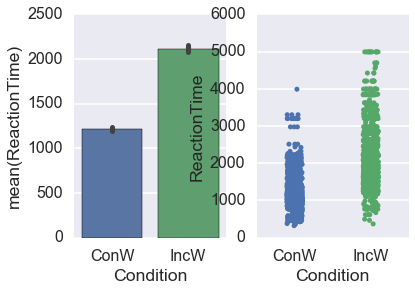

In [42]:
fig, axes = plt.subplots(ncols=2, nrows=1)
sns.barplot(x='Condition', y='ReactionTime', data=df, ax=axes[0])
sns.stripplot(x='Condition', y='ReactionTime', data=df, ax=axes[1],
              jitter=True)

## Data Visualization is described in Declarative Style

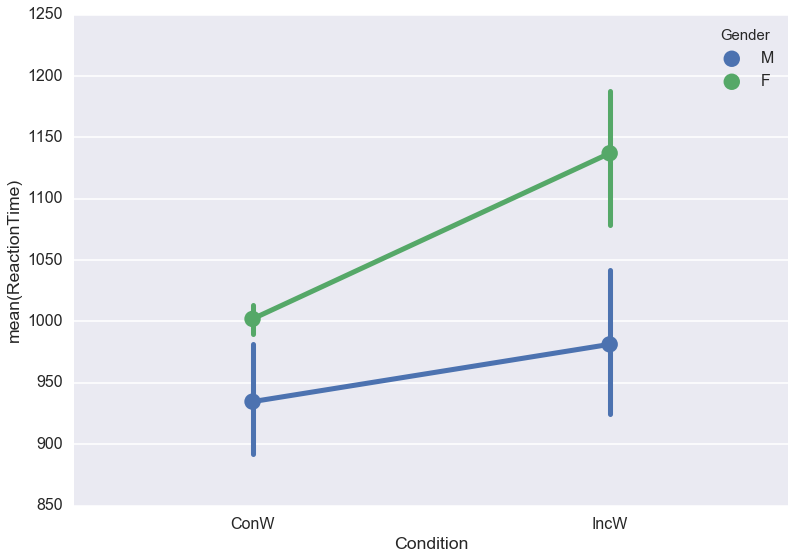

In [5]:
sns.pointplot(x='Condition', y='ReactionTime', hue='Gender', data=df)

## FacetGrid: Map plotting functions across subplots

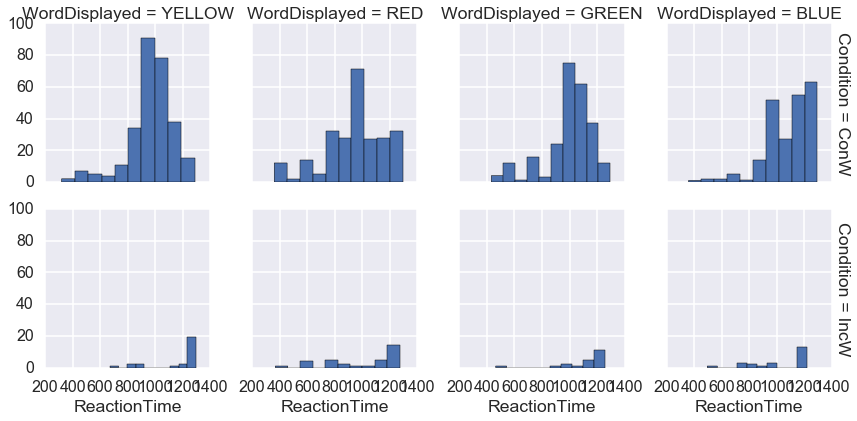

In [6]:
g = sns.FacetGrid(df, row='Condition', col='WordDisplayed', margin_titles=True)
g.map(plt.hist, 'ReactionTime', bins=10)

# FacetGrid Example 2: Mapping plt.scatter to subplots

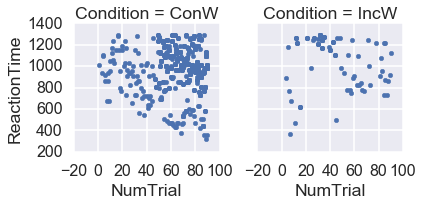

In [7]:
g = sns.FacetGrid(df, col='Condition', margin_titles=True)
g.map(plt.scatter, 'NumTrial', 'ReactionTime')

## FactorPlot: Seaborn Plotting in a FacetGrid

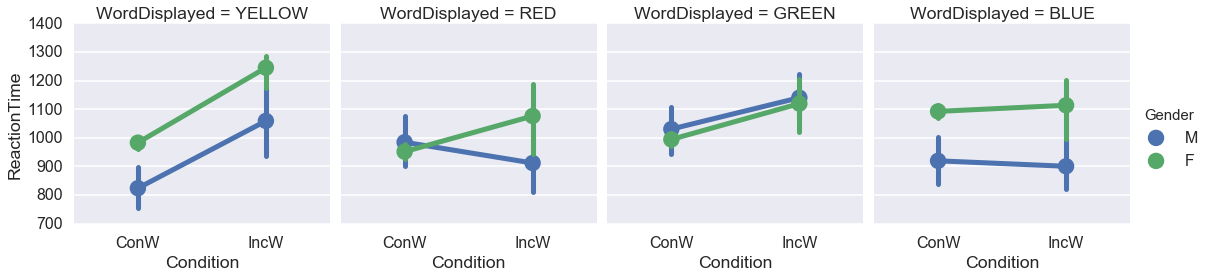

In [8]:
g = sns.factorplot(x='Condition', y='ReactionTime', hue='Gender', 
                   col='WordDisplayed', data=df,
                  )

## LMPlot: Look for Linear Relationships Between Variables

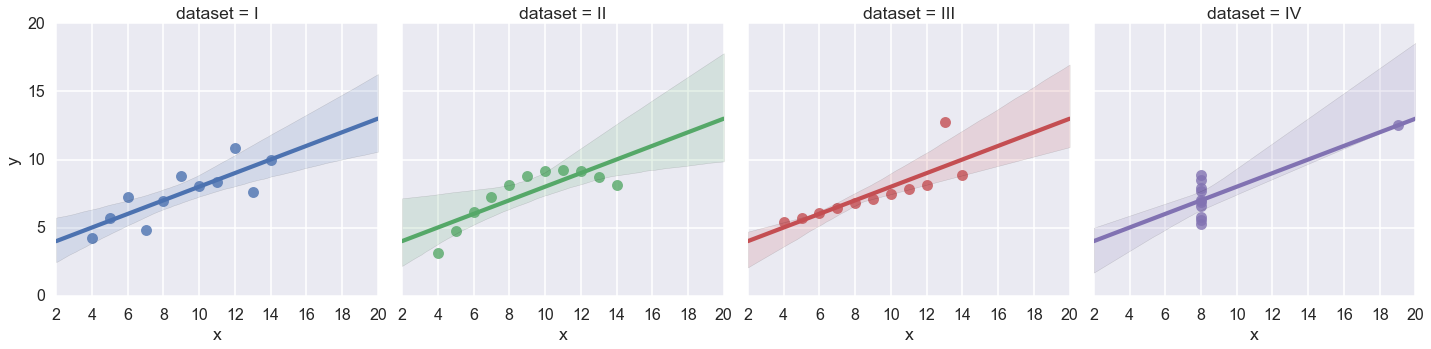

In [114]:
adf = sns.load_dataset("anscombe")
sns.lmplot(data=adf, x="x", y="y", col="dataset", hue="dataset", 
           col_wrap=4, scatter_kws={'s': 120})

## Pandas In-Line Querying and Changing Line Fit Parameters

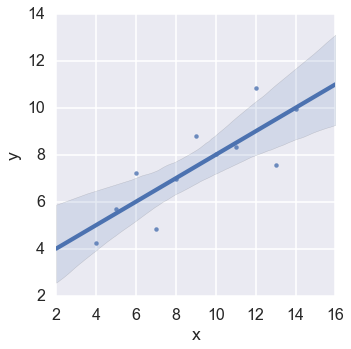

In [10]:
sns.lmplot(x="x", y="y", data=adf.query("dataset == 'I'"),
          ci=95, order=1, robust=False)

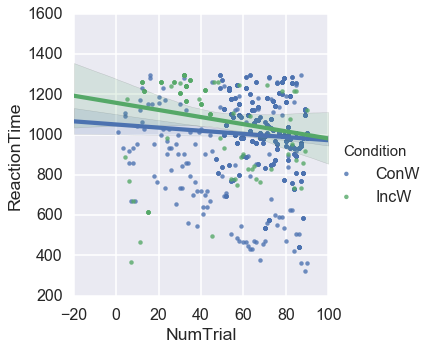

In [11]:
sns.lmplot(x='NumTrial', y='ReactionTime', hue='Condition', data=df)

## JointPlot: Add Statistics Annotations to the Scatter Plot

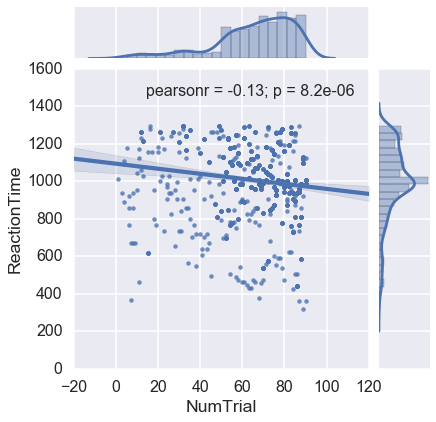

In [12]:
from scipy.stats import pearsonr, spearmanr
sns.jointplot(x='NumTrial', y='ReactionTime', data=df,
              stat_func=pearsonr, kind='reg')  # also try 'hex' and 'kde'

## Seaborn Gallery
Check out the documentation to see all the options!

In [13]:
%%HTML
<iFrame src="http://stanford.edu/~mwaskom/software/seaborn/examples/index.html" width=900 height=400></iFrame>

## SQLAlchemy, Pandas, and Seaborn

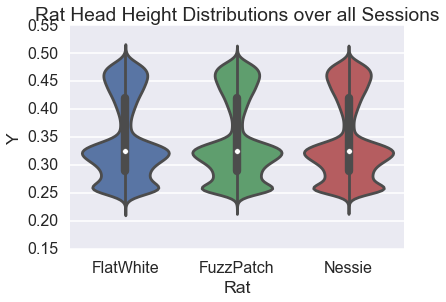

In [116]:
con = sqlalchemy.create_engine('sqlite:///ratdata.db')
data = pd.read_sql_query('SELECT Y, rat FROM behavior, sessions', con)
sns.violinplot(x='Rat', y='Y', data=data)
plt.title('Rat Head Height Distributions over all Sessions')

# Fitting Distributions in Scipy.stats

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7faff3f27240>], dtype=object)

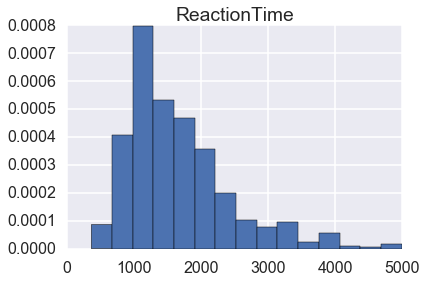

In [56]:
df = pd.read_csv(path.join('Homework Sample Data', 'Homework 6', 'StroopData.csv'))
df = df.query('350 < ReactionTime < 5000')
fig, ax = plt.subplots()
df.hist(column='ReactionTime', bins=15, normed=True, ax=ax)

## Besides Statistical Testing, Scipy.Stats also has Distributions Objects

In [92]:
%%HTML
<iFrame src="http://docs.scipy.org/doc/scipy/reference/stats.html" width=900 height=400></iFrame>

## Fitting a Distribution to Data

In [62]:
from scipy import stats
dist = stats.exponnorm
fitparams = dist.fit(df['ReactionTime'])
fitparams

(3.4778874950116387, 871.70915141643763, 223.47178008990244)

### Producing a Probability Distribution from Fit Parameters

In [66]:
x = np.linspace(500, 5000, 100)
pdf = dist.pdf(x, *fitparams)
print(x[:4], pdf[:4], sep='\n')

[ 500.          545.45454545  590.90909091  636.36363636]
[  5.52431605e-05   8.21846089e-05   1.17946316e-04   1.63393993e-04]


## Plotting Distribution Fit to Data

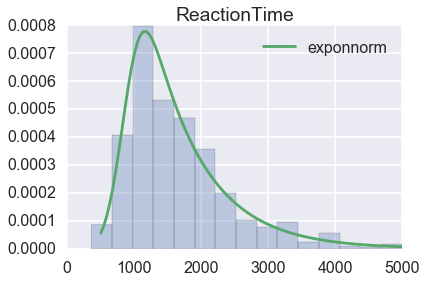

In [69]:
fig, ax = plt.subplots()
df.hist(column='ReactionTime', bins=15, normed=True, ax=ax, alpha=.3)
ax.plot(x, pdf, label=dist.name)
ax.legend()

## The Distribution Objects' Common Interface Makes Batch Plotting Easy!

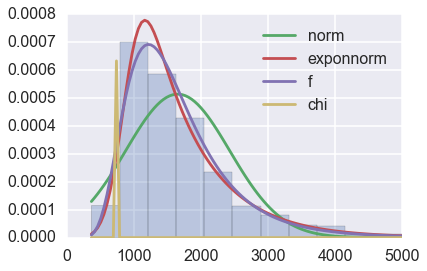

In [113]:
fig, ax = plt.subplots()
reaction_time = df['ReactionTime']
reaction_time.hist(bins=11, normed=True, ax=ax, alpha=.3)
for dist in [stats.norm, stats.exponnorm, stats.f, stats.chi]:
    x = np.linspace(reaction_time.min(), reaction_time.max(), 100)
    ax.plot(x, dist.pdf(x, *dist.fit(reaction_time)), label=dist.name)
    ax.legend()

## Distribution Fitting with Seaborn's distplot() function

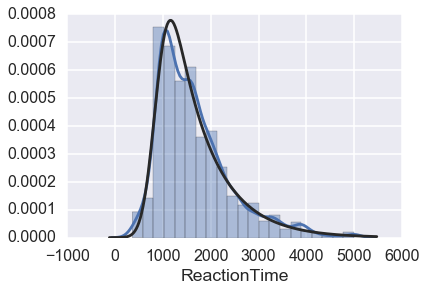

In [111]:
sns.distplot(df['ReactionTime'], bins=21, fit=stats.exponnorm)

# Questions / Discussion